## Working though the outputted flares file to determine the final statistics for the flares sample

In [79]:
# Import modules 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [32]:
flares = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/final_seen_flares.csv')
print(flares)
print(str(len(flares)) + ' flares have been determined in this sample.')

         # star_no   flux_ratio   duration        energy   flare_amplitudes
0           7402.0     0.002264   1.827463  1.519911e+32       6.887773e-14
1           7402.0     0.003331   2.655259  1.321941e+34       1.013680e-13
2           7402.0     0.002285   1.905069  2.310130e+32       6.954084e-14
3           7402.0     0.002380   2.112018  7.054802e+32       7.241288e-14
4           7402.0     0.002264   1.827463  1.519911e+32       6.887773e-14
...            ...          ...        ...           ...                ...
1109661    21565.0     0.003579   1.827463  1.519911e+32       6.887773e-14
1109662    21565.0     0.003570   1.801595  1.321941e+32       6.869176e-14
1109663    21565.0     0.003579   1.827463  1.519911e+32       6.887773e-14
1109664    21565.0     0.003590   1.853332  1.747528e+32       6.908023e-14
1109665    21565.0     0.004456   2.474179  4.977024e+33       8.575361e-14

[1109666 rows x 5 columns]
1109666 flares have been determined in this sample.


In [37]:
print('The shortest flare in this sample is ' + str(round(10**min(flares[' duration']),2)) + ' minutes.')
print('The longest flare in this sample is ' + str(round(10**max(flares[' duration']),2)) + ' minutes.')
print('The longest flare is equivalent too ' + str(round(10**max(flares[' duration'])/60,2)) + ' hours.')

The shortest flare in this sample is 56.22 minutes.
The longest flare in this sample is 19274.49 minutes.
The longest flare is equivalent too 321.24 hours.


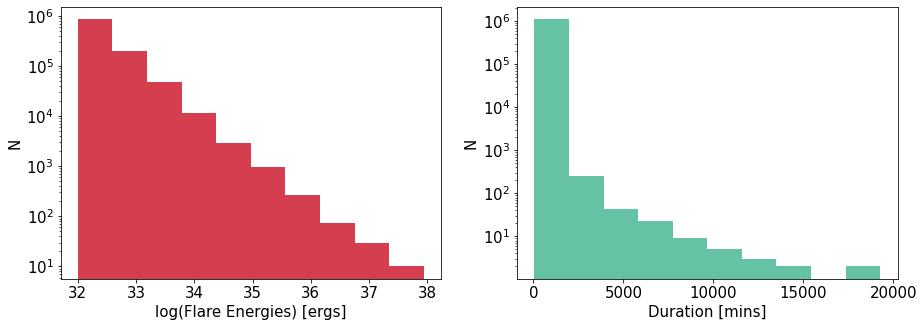

In [61]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(np.log10(flares[' energy']), color='#d53e4f')
plt.ylabel('N', fontsize=15)
plt.xlabel('log(Flare Energies) [ergs]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.hist(10**flares[' duration'], color='#66c2a5')
plt.ylabel('N', fontsize=15)
plt.xlabel('Duration [mins]', fontsize=15)
plt.yscale('log')
plt.xticks(ticks=[0, 5000, 10000, 15000, 20000], fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_all_duration_and_energies.png')
plt.show()

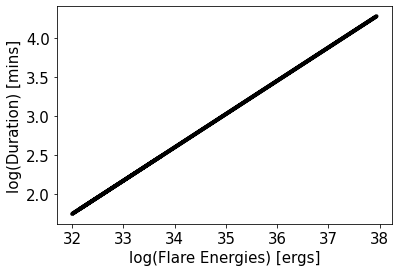

In [62]:
plt.plot(np.log10(flares[' energy']), flares[' duration'], linewidth=4, color='black')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('log(Duration) [mins]', fontsize=15)
plt.xlabel('log(Flare Energies) [ergs]', fontsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_plots/P_flare_duration_relation_check.png')
plt.show()

In [63]:
# Cutting flares for energy - only include 'sueprflares'.
rows = flares[(flares[" energy"] >= 1e34)]
rows.to_csv('/Users/jess/sf_m_dwarfs/sf_data_files/final_seen_superflares.csv')
print(str(len(rows)) + ' flares can be classes as superflares.')

10650 flares can be classes as superflares.


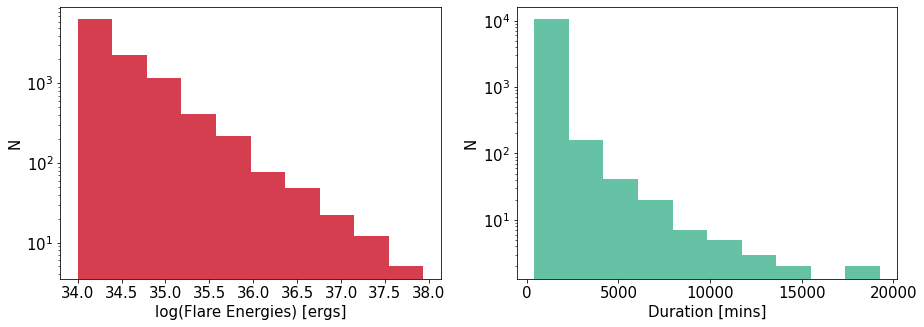

In [66]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(np.log10(rows[' energy']), color='#d53e4f')
plt.ylabel('N', fontsize=15)
plt.xlabel('log(Flare Energies) [ergs]', fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(122)
plt.hist(10**rows[' duration'], color='#66c2a5')
plt.ylabel('N', fontsize=15)
plt.xlabel('Duration [mins]', fontsize=15)
plt.yscale('log')
plt.xticks(ticks=[0, 5000, 10000, 15000, 20000], fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_sf_duration_and_energies.png')
plt.show()

In [73]:
# Cut down to duration 
print('In the superflare sample the shortest flare is: ' + str(round(10**min(rows[' duration']),2)) + ' minutes.')
print('In the superflare sample the longest flare is: ' + str(round(10**max(rows[' duration']),2)) + ' minutes.')
print(str(round(10**max(rows[' duration']),2)) + ' minutes corresponds to ' + str(round(10**max(rows[' duration'])/60,2)) + ' hours.')

In the superflare sample the shortest flare is: 401.35 minutes.
In the superflare sample the longest flare is: 19274.49 minutes.
19274.49 minutes corresponds to 321.24 hours.


In [78]:
shib_flares = 1571 
shib_stars = 279
our_binaries = 14165

print('Average superflare per Star in our Sample: ' + str(len(rows)/our_binaries))
print('Average superflare per Star in Shibayama: ' + str(shib_flares/shib_stars))

Average superflare per Star in our Sample: 0.7518531591951995
Average superflare per Star in Shibayama: 5.630824372759856


In [85]:
n_flares = shib_flares
n_sample = shib_stars

In [94]:
# Defining a function for the Poisson statistics

def poisson(n_flares, n_sample):
    
    frac = float(n_flares)/n_sample

    delt = frac * math.sqrt(n_binaries**-1 + n_sample**-1)
    max_lim = frac + delt 
    min_lim = frac - delt 
    
    print('The fraction of flares per star is: ' + str(frac))
    print("The maximum limit is: " + str(max_lim) + " and the minimum limit is: " + str(min_lim))
    print("The Possion error for the number of flares per star is: " + str(delt))

In [95]:
print('Shibayama Dwarfs')
poisson(n_flares, n_sample)

Shibayama Dwarfs
The fraction of flares per star is: 2.3157894736842106
The maximum limit is: 2.9515099667226132 and the minimum limit is: 1.680068980645808
The Possion error for the number of flares per star is: 0.6357204930384026


In [96]:
print('This Work')
n_flares = len(rows)
n_sample = our_binaries

poisson(n_flares, n_sample)

This Work
The fraction of flares per star is: 0.7518531591951995
The maximum limit is: 0.8653751917584477 and the minimum limit is: 0.6383311266319512
The Possion error for the number of flares per star is: 0.11352203256324826


In [97]:
print('Shibayama Sun Like')
n_flares = 44
n_sample = 19

poisson(n_flares, n_sample)

Shibayama Sun Like
The fraction of flares per star is: 2.3157894736842106
The maximum limit is: 2.9515099667226132 and the minimum limit is: 1.680068980645808
The Possion error for the number of flares per star is: 0.6357204930384026


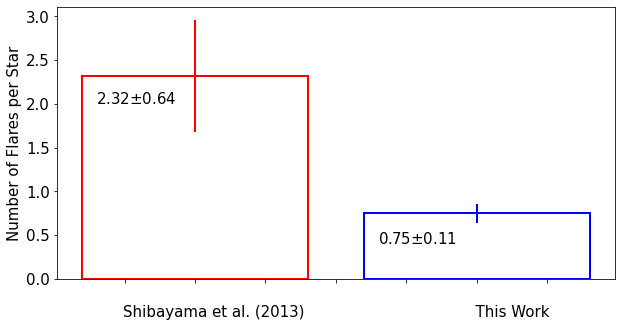

In [101]:
a = 1
b = 2.32
c = 2
d = 0.75
plt.figure(figsize=(10, 5))

plt.errorbar(a, b, yerr=0.64, color='red', linewidth=2)
plt.errorbar(c, d, yerr=0.11, color='blue', linewidth=2)
plt.bar(a, b, color='white', edgecolor='red', linewidth=2)
plt.bar(c, d, color='white', edgecolor='blue', linewidth=2)
plt.ylabel('Number of Flares per Star', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(color='white') 
plt.xlabel('Shibayama et al. (2013)                                    This Work', fontsize=15)
plt.text(0.65, 2.0, r'2.32$\pm$0.64', fontsize=15)
plt.text(1.65, 0.4, r'0.75$\pm$0.11', fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_relative_flare_to_stars.png')
plt.show()